In [1]:
import pandas as pd
import numpy as np

from google.cloud import bigquery
from google.oauth2 import service_account

credentials = service_account.Credentials.from_service_account_file("C:\\Users\\Joanna Kang\\Documents\\GitHub\\Sales-dashboard\\My First Project-c1aa474eca74.json")
project_id = 'rare-shuttle-279916'

In [2]:
client = bigquery.Client()

In [3]:
%load_ext google.cloud.bigquery

In [4]:
import google.auth
from google.cloud import bigquery
from google.cloud import bigquery_storage_v1beta1

credentials, your_project_id = google.auth.default(
    scopes=["https://www.googleapis.com/auth/cloud-platform"]
)

# Make clients.
bqclient = bigquery.Client(
    credentials=credentials,
    project= 'rare-shuttle-279916',
)
bqstorageclient = bigquery_storage_v1beta1.BigQueryStorageClient(
    credentials=credentials
)

In [5]:
query_job_1 = client.query('''SELECT * FROM `rare-shuttle-279916.Amazon.productlist_200625` LIMIT 20000
''')
productlist = query_job_1.to_dataframe()

In [6]:
def column_replace(productlist, columns, new_column):
    productlist_before = []
    productlist_new = new_column
    for i in range(len(columns)):
        productlist_before.append(columns[i])

    for i in range(len(new_column)):
        productlist_new.append(new_column[i])

    for i in range(len(productlist_before)):
        productlist = productlist.rename({productlist_before[i] : productlist_new[i]}, axis = 'columns')
    
    productlist = productlist.drop([productlist.index[0]])

    return productlist

productlist = column_replace(productlist, productlist.columns, ['Batch', 'SKU', 'ASIN', 'BARCODE', 'NAME(KR)', 'SKU_2', 'ASIN_2', 'CHARACTER', 'CATEGORY', 'ITEM', 'THEME', 'PRODUCT_NAME(KR)'])

#productlist = productlist.drop([productlist.index[0]])
productlist = productlist.sort_values(by='Batch')

In [7]:
productlist = productlist.drop_duplicates('SKU', keep='last')

In [8]:
productlist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 906 entries, 445 to 847
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Batch             906 non-null    object
 1   SKU               906 non-null    object
 2   ASIN              708 non-null    object
 3   BARCODE           906 non-null    object
 4   NAME(KR)          906 non-null    object
 5   SKU_2             906 non-null    object
 6   ASIN_2            705 non-null    object
 7   CHARACTER         906 non-null    object
 8   CATEGORY          906 non-null    object
 9   ITEM              906 non-null    object
 10  THEME             906 non-null    object
 11  PRODUCT_NAME(KR)  906 non-null    object
dtypes: object(12)
memory usage: 92.0+ KB


In [9]:
julysale = pd.read_csv("C:\\Users\\Joanna Kang\\Desktop\\TASK\\5. Data Anaylsis\\2020_July_trend\\sales_2020-06-01_2020-07-12.csv")

In [10]:
julysale.columns.values[1] = 'SKU'

In [11]:
julysale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2355 entries, 0 to 2354
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_title      2355 non-null   object 
 1   SKU                2355 non-null   object 
 2   day                2355 non-null   object 
 3   pos_location_name  0 non-null      float64
 4   net_quantity       2355 non-null   int64  
 5   gross_sales        2355 non-null   float64
 6   discounts          2355 non-null   float64
 7   returns            2355 non-null   float64
 8   net_sales          2355 non-null   float64
 9   taxes              2355 non-null   float64
 10  total_sales        2355 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 202.5+ KB


In [12]:
julysale = pd.merge(julysale, productlist, how = 'left', on = 'SKU')

In [13]:
julysale

,product_title,SKU,day,pos_location_name,net_quantity,gross_sales,discounts,returns,net_sales,taxes,...,ASIN,BARCODE,NAME(KR),SKU_2,ASIN_2,CHARACTER,CATEGORY,ITEM,THEME,PRODUCT_NAME(KR)
0,Portable Fan with Cradle Stand - Ryan,F08846,2020-06-25,NaN,5,133.27,-21.30,0.00,111.97,22.40,...,B07RZ1FSN7,8809641467386,크레들 핸디형 선풍기_라이언,F08846,B07RZ1FSN7,Ryan,Home,Fans,Basic,크레들 핸디형 선풍기_라이언
1,"Yumyum Friends, Tote bag - Little Ryan",F10931,2020-06-05,NaN,5,114.95,-3.43,0.00,111.52,0.00,...,None,8809681708968,얌얌 에코백_리틀라이언,F10931,None,Ryan,Accessories,Canvas bag,Lemon Terras,얌얌 에코백_리틀라이언
2,"KANGDANIEL EDITION, Plush Keyring - Happy Apeach",F10486,2020-07-01,NaN,4,30.32,0.00,0.00,30.32,6.04,...,0,8809681704632,강다니엘에디션 소프트키링_해피어피치,F10486,0,Apeach,Accessories,Keyrings,Kang Daniel,강다니엘에디션 소프트키링_해피어피치
3,"Happy Weeks, Multi Coloured Pen, 4 Colours & M...",F10761,2020-07-02,NaN,4,26.63,-7.99,0.00,18.64,3.73,...,B084JMJSBS,8809681707558,해피위크 4컬러+샤프 멀티펜_어피치,F10761,B084JMJSBS,Apeach,Stationery,Pen,Happy Weeks,해피위크 4컬러+샤프 멀티펜_어피치
4,"KANGDANIEL EDITION, Body Pillow - Apeach",F10571,2020-07-01,NaN,4,79.96,0.00,0.00,79.96,16.00,...,B084D6DY4R,8809681705714,강다니엘에디션 바디필로우,F10571,B084D6DY4R,Apeach,Plush,Body pillow,Kang Daniel,강다니엘에디션 바디필로우
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2350,Metal Pin Badges - Red Cape Muzi,93008635,2020-06-23,NaN,-1,0.00,0.00,-5.39,-5.39,0.00,...,B07QXHSPWM,8809641465009,프렌즈뱃지_빨간망토 무지,93008635,B07QXHSPWM,Muzi,Accessories,Pin badge,Basic,프렌즈뱃지_빨간망토 무지
2351,Headband with Ribbon Lavender for Makeup Facia...,F08590,2020-07-03,NaN,-1,0.00,0.00,-7.84,-7.84,-1.25,...,B07TKZ7PQB,8809641464897,러블리어피치 세안밴드_라벤더,F08590,B07TKZ7PQB,Apeach,Bath,Hairbands,Lovely Apeach,러블리어피치 세안밴드_라벤더
2352,Portable Fan with Cradle Stand - Ryan,93008882,2020-06-08,NaN,-2,0.00,0.00,-35.82,-35.82,-7.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2353,"Skateboard Cotton Face Socks - Ryan, Heel",93009450,2020-06-16,NaN,-2,0.00,0.00,-6.48,-6.48,0.00,...,B07RYN2GKC,8809656137113,라인보드삭스-라이언,93009450,B07RYN2GKC,Ryan,Accessories,Socks,Basic,라인보드삭스-라이언


In [14]:
julysale['day'] = pd.to_datetime(julysale['day'])

In [15]:
julysale['dayofweek'] = julysale['day'].dt.week
julysale['year'] = julysale['day'].dt.year
julysale['month'] = julysale['day'].dt.month


In [16]:
julysale = julysale.loc[julysale['month'].isin([7])]
julysale

,product_title,SKU,day,pos_location_name,net_quantity,gross_sales,discounts,returns,net_sales,taxes,...,SKU_2,ASIN_2,CHARACTER,CATEGORY,ITEM,THEME,PRODUCT_NAME(KR),dayofweek,year,month
2,"KANGDANIEL EDITION, Plush Keyring - Happy Apeach",F10486,2020-07-01,NaN,4,30.32,0.00,0.00,30.32,6.04,...,F10486,0,Apeach,Accessories,Keyrings,Kang Daniel,강다니엘에디션 소프트키링_해피어피치,27,2020,7
3,"Happy Weeks, Multi Coloured Pen, 4 Colours & M...",F10761,2020-07-02,NaN,4,26.63,-7.99,0.00,18.64,3.73,...,F10761,B084JMJSBS,Apeach,Stationery,Pen,Happy Weeks,해피위크 4컬러+샤프 멀티펜_어피치,27,2020,7
4,"KANGDANIEL EDITION, Body Pillow - Apeach",F10571,2020-07-01,NaN,4,79.96,0.00,0.00,79.96,16.00,...,F10571,B084D6DY4R,Apeach,Plush,Body pillow,Kang Daniel,강다니엘에디션 바디필로우,27,2020,7
8,"Socks, Navy - Ryan",F10982,2020-07-11,NaN,4,23.69,-7.10,0.00,16.59,2.98,...,F10982,#N/A,Ryan,Accessories,Socks,Happy Weeks,프렌즈미디움삭스(공용)_네이비라이언,28,2020,7
11,"Happy Weeks, Removable Stickers - Apeach",F10751,2020-07-03,NaN,4,17.05,-5.11,0.00,11.94,2.03,...,F10751,B084JSM6YB,Apeach,Stationery,Stickers,Happy Weeks,해피위크 리무버블스티커_어피치,27,2020,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,Luggage Tag - Little Tube,F08278,2020-07-06,NaN,-1,0.00,0.00,-5.16,-5.16,-0.83,...,F08278,B07ST3XLGP,Tube,Travel,Luggage Tags,Little Friends,실리콘 전신네임택-리틀튜브,28,2020,7
2343,Keyring - Hoodie Tube,93008354,2020-07-06,NaN,-1,0.00,0.00,-6.03,-6.03,-0.96,...,93008354,B07PVKQ9FT,Tube,Tech&Accs,Airpods Keyring,Basic,에어팟 피규어 키링-튜브,28,2020,7
2347,"Happy Weeks, Sticky Note Set",F10755,2020-07-06,NaN,-1,0.00,0.00,-6.03,-6.03,-0.96,...,F10755,0,Ryan,Stationery,Sticky Notes & Memos,Happy Weeks,해피위크 점착메모세트,28,2020,7
2348,"KANGDANIEL EDITION, Plush Keyring - Kitten Peter",F10573,2020-07-09,NaN,-1,0.00,0.00,-8.44,-8.44,-1.35,...,F10573,B083TY8K15,Apeach,Accessories,Plush Keyring,Kang Daniel,강다니엘에디션 페이스키체인_냥이p,28,2020,7


In [17]:
julysale.loc[julysale['CATEGORY'] == 'Stationeries', 'CATEGORY'] = 'Stationery'
julysale.loc[julysale['CHARACTER'] == 'All', 'CHARACTER'] = 'Together'

In [18]:
#각 주차 별 동일한 기준인지 체크
weekcheck = julysale[['day','dayofweek']]
weekcheck = weekcheck.drop_duplicates()
weekcheck['dayofweek'].value_counts()

28    7
27    5
Name: dayofweek, dtype: int64

In [19]:
theme_sale = pd.pivot_table(julysale, index = ['THEME', 'CATEGORY', 'ITEM', 'product_title'], columns = ['dayofweek'], values = 'net_quantity', aggfunc=np.sum, fill_value = 0, margins = True)
theme_sale

dayofweek                                                                                          27  \
THEME          CATEGORY    ITEM                 product_title                                           
Autumn Story   Plush       Plush Toys           Autumn Story Plush Set - Squirrel Family            4   
               Stationery  Sticky Notes & Memos Autumn Story Memo - Acorn                           1   
Baby Dreaming  Accessories Canvas Bag           Baby Dreaming Theme, Bag - Little Ryan              0   
                           Plush Keyring        Baby Dreaming Theme, Plush Keyring - Little Muzi    0   
                                                Baby Dreaming Theme, Plush Keyring - Little Ryan    0   
...                                                                                               ...   
Yamyam Friends Accessories Pouches              Yumyum Friends, Pouch - Little Ryan                 1   
               Living      Coin Wallets         Yumyum Friends, Coin Wallet - Little Ryan           2   
               Tech&Accs   Airpods case         Yumyum Friends, AirPods Case- Little Jay-G          1   
                                                Yumyum Friends, AirPods Case- Little Ryan           3   
All                                                                                               387   

dayofweek                                                                                          28  \
THEME          CATEGORY    ITEM                 product_title                                           
Autumn Story   Plush       Plush Toys           Autumn Story Plush Set - Squirrel Family            2   
               Stationery  Sticky Notes & Memos Autumn Story Memo - Acorn                           2   
Baby Dreaming  Accessories Canvas Bag           Baby Dreaming Theme, Bag - Little Ryan              1   
                           Plush Keyring        Baby Dreaming Theme, Plush Keyring - Little Muzi    1   
                                                Baby Dreaming Theme, Plush Keyring - Little Ryan    1   
...                                                                                               ...   
Yamyam Friends Accessories Pouches              Yumyum Friends, Pouch - Little Ryan                 0   
               Living      Coin Wallets         Yumyum Friends, Coin Wallet - Little Ryan           3   
               Tech&Accs   Airpods case         Yumyum Friends, AirPods Case- Little Jay-G          0   
                                                Yumyum Friends, AirPods Case- Little Ryan           1   
All                                                                                               300   

dayofweek                                                                                         All  
THEME          CATEGORY    ITEM                 product_title                                          
Autumn Story   Plush       Plush Toys           Autumn Story Plush Set - Squirrel Family            6  
               Stationery  Sticky Notes & Memos Autumn Story Memo - Acorn                           3  
Baby Dreaming  Accessories Canvas Bag           Baby Dreaming Theme, Bag - Little Ryan              1  
                           Plush Keyring        Baby Dreaming Theme, Plush Keyring - Little Muzi    1  
                                                Baby Dreaming Theme, Plush Keyring - Little Ryan    1  
...                                                                                               ...  
Yamyam Friends Accessories Pouches              Yumyum Friends, Pouch - Little Ryan                 1  
               Living      Coin Wallets         Yumyum Friends, Coin Wallet - Little Ryan           5  
               Tech&Accs   Airpods case         Yumyum Friends, AirPods Case- Little Jay-G          1  
                                                Yumyum Friends, AirPods Case- Little Ryan           4  
All                 

In [20]:
theme_sale

dayofweek                                                                                          27  \
THEME          CATEGORY    ITEM                 product_title                                           
Autumn Story   Plush       Plush Toys           Autumn Story Plush Set - Squirrel Family            4   
               Stationery  Sticky Notes & Memos Autumn Story Memo - Acorn                           1   
Baby Dreaming  Accessories Canvas Bag           Baby Dreaming Theme, Bag - Little Ryan              0   
                           Plush Keyring        Baby Dreaming Theme, Plush Keyring - Little Muzi    0   
                                                Baby Dreaming Theme, Plush Keyring - Little Ryan    0   
...                                                                                               ...   
Yamyam Friends Accessories Pouches              Yumyum Friends, Pouch - Little Ryan                 1   
               Living      Coin Wallets         Yumyum Friends, Coin Wallet - Little Ryan           2   
               Tech&Accs   Airpods case         Yumyum Friends, AirPods Case- Little Jay-G          1   
                                                Yumyum Friends, AirPods Case- Little Ryan           3   
All                                                                                               387   

dayofweek                                                                                          28  \
THEME          CATEGORY    ITEM                 product_title                                           
Autumn Story   Plush       Plush Toys           Autumn Story Plush Set - Squirrel Family            2   
               Stationery  Sticky Notes & Memos Autumn Story Memo - Acorn                           2   
Baby Dreaming  Accessories Canvas Bag           Baby Dreaming Theme, Bag - Little Ryan              1   
                           Plush Keyring        Baby Dreaming Theme, Plush Keyring - Little Muzi    1   
                                                Baby Dreaming Theme, Plush Keyring - Little Ryan    1   
...                                                                                               ...   
Yamyam Friends Accessories Pouches              Yumyum Friends, Pouch - Little Ryan                 0   
               Living      Coin Wallets         Yumyum Friends, Coin Wallet - Little Ryan           3   
               Tech&Accs   Airpods case         Yumyum Friends, AirPods Case- Little Jay-G          0   
                                                Yumyum Friends, AirPods Case- Little Ryan           1   
All                                                                                               300   

dayofweek                                                                                         All  
THEME          CATEGORY    ITEM                 product_title                                          
Autumn Story   Plush       Plush Toys           Autumn Story Plush Set - Squirrel Family            6  
               Stationery  Sticky Notes & Memos Autumn Story Memo - Acorn                           3  
Baby Dreaming  Accessories Canvas Bag           Baby Dreaming Theme, Bag - Little Ryan              1  
                           Plush Keyring        Baby Dreaming Theme, Plush Keyring - Little Muzi    1  
                                                Baby Dreaming Theme, Plush Keyring - Little Ryan    1  
...                                                                                               ...  
Yamyam Friends Accessories Pouches              Yumyum Friends, Pouch - Little Ryan                 1  
               Living      Coin Wallets         Yumyum Friends, Coin Wallet - Little Ryan           5  
               Tech&Accs   Airpods case         Yumyum Friends, AirPods Case- Little Jay-G          1  
                                                Yumyum Friends, AirPods Case- Little Ryan           4  
All                 

In [21]:
littlefriends = theme_sale.query("THEME == ['Little Friends']").head(50)
littlefriends.sort_values(by='All', ascending= False)

dayofweek                                                                                           27  \
THEME          CATEGORY    ITEM                 product_title                                            
Little Friends Stationery  Message Cards        Cake Card - Apeach                                   4   
                                                Cake Card - Apeach, Ryan, Frodo                      7   
               Accessories Card Wallets         Foldable Card ID Wallet with Neck Strap - Ryan       3   
                                                Foldable Card ID Wallet with Neck Strap - Apeach     3   
               Plush       Face Cushions        Soft Face Cushion - Apeach                           1   
               Tech&Accs   Airpods case         Silicone AirPods Pro Case - Little Ryan              0   
               Home        Mood Lamp            Silicone Mood Lamp - Little Ryan                     1   
               Stationery  Message Cards        Heart Card - Ryan                                    2   
               Living      Sleeping Masks       Sleeping Mask - Little Ryan                          1   
               Stationery  Message Cards        L.O.V.E. Card - Neo                                  1   
               Living      Rubbish Bin          Mini Desktop Rubbish Bin - Little Ryan               1   
               Stationery  Pencil Cases         Plush Pencil Case - Ryan                             2   
               Tech&Accs   Airpods Keyring      Keyring for AirPods cases - Little Muzi              0   
               Plush       Mini Pillow          Mini Pillow - Little Frodo                           0   
               Tech&Accs   Airpods case         AirPods Pro Case Cover with Keyring -Little Apeach   1   
                                                AirPods Pro Case Cover with Keyring -Little Ryan     0   
               Pet         Poop bag             Dog Poop Bag Case - Ryan                             2   
               Tech&Accs   Airpods case         PU AirPods Case - Little Apeach                      1   
               Accessories Card Wallets         Basic Card Holder - Ryan                             2   
               Home        Humidifier           Humidifier - Little Apeach                           0   
                           Mood Lamp            Silicone Mood Lamp - Little Apeach                   0   
                           Humidifier           Humidifier - Little Ryan                             0   
               Accessories Keyrings             Keyring - Tiny Frodo                                 0   
               Stationery  Pen                  Retractable Highlighters Pen Set - Little Ryan       1   
                           Pencil Cases         Plush Pencil Case - Muzi                             1   
               Accessories Keyrings             Keyring - Tiny Muzi                                  1   
               Stationery  Stickers             Decoration Sticker - Little Neo                      0   
               Accessories Keyrings             Keyring - Tiny Jay-G                                 1   
               Living      Mobile Number Plates Mobile Number Plate - Ryan                           0   
               Accessories Coin Wallets         Coin Wallet with Key Ring - Ryan                     1   
               Stationery  Notepads             Mini A6 Ruled Notepad - Ryan                         2   
               Tech&Accs   Airpods case         Airpods Case Cover - Ribbon Apeach                   0   
                                                Basic AirPods Case - Little Apeach                   1   
                                                Basic AirPods Case - Little Ryan                     0   
               Accessories Coin Wallets         Coin Wallet with Band - Neo                          0   
               Stationery  Pen                  Retractable Highlighters Pen S

In [22]:
Happyweeks = theme_sale.query("THEME == ['Happy Weeks']").head(50)
Happyweeks.sort_values(by ='All', ascending= False)

dayofweek                                                                                        27  \
THEME       CATEGORY    ITEM                 product_title                                            
Happy Weeks Accessories Socks                Socks, Navy - Ryan                                   3   
            Stationery  Stickers             Happy Weeks, Removable Stickers - Apeach             5   
                        Pen                  Happy Weeks, Multi Coloured Pen, 4 Colours & Me...   5   
            Tech&Accs   Airpods case         Happy Weeks, AirPods Case - Apeach                   2   
            Accessories Socks                Socks, Pink - Apeach                                 4   
            Stationery  Notepads             Happy Weeks, A5 Ringbound Notepad - Apeach           3   
                        Sticky Notes & Memos Happy Weeks, Sticky Note Set                         6   
                        Letter set           Happy Weeks, Letters and Envelopes Sets - Apeach     4   
                        Pen                  Happy Weeks, Ballpoint Pen Set, 0.7mm Black ink...   2   
            Tech&Accs   Mouse Pad            Happy Weeks, Mouse Pad - Ryan                        2   
                        Airpods case         Happy Weeks, AirPods Pro Case - Apeach               2   
            Stationery  Stickers             Happy Weeks, Removable Stickers - Ryan               1   
            Tech&Accs   Mouse Pad            Happy Weeks, Mouse Pad - Muzi                        0   
            Stationery  Stickers             Happy Weeks, Diary Decoration Sticker                0   
                        Pen                  Happy Weeks, Multi Coloured Pen, 4 Colours & Me...   3   
                        Notepads             Happy Weeks, Ruled Note - Sunday Tube                4   
                                             Happy Weeks, PVC Cover Ruled Notepad - Apeach        3   
            Accessories Socks                Socks, Board - Ryan                                  1   
                                             Socks, Happy Week - Muzi & Con & Ryan                0   
                                             Low Cut Socks - Ryan & Apeach                        0   
            Stationery  Stickers             Happy Weeks, Face Stickers - Apeach, Muzi            0   
                        Notepads             Happy Weeks, A5 Ringbound Notepad - Ryan             1   
            Accessories Socks                Socks, Happy Saturday - Ryan & Con                   1   
            Stationery  Notepads             Happy Weeks, PVC Cover Ruled Notepad - Ryan          2   
                                             Happy Weeks, Ruled Note - Friday Apeach              2   
                                             Happy Weeks, Ruled Note - Monday Muzi                1   
                        Message Cards        Happy Weeks, Message Card - Apeach                   2   
            Accessories Socks                Socks, Tulip - Apeach                                2   
            Stationery  Desk Mat             Happy Weeks, Desk Mat - Apeach                       0   
                        Pen                  Happy Weeks, Multi Coloured Pen, 4 Colours & Me...   1   
            Tech&Accs   Airpods case         Happy Weeks, AirPods Case - Ryan                     0   
            Stationery  Index Folder         Happy Weeks, Document Index file - Apeach            0   
                        Stickers             Happy Weeks, Face Stickers - Ryan, Tube              0   
                        Mouse Pad            Happy Weeks, Mouse Pad - Apeach                      0   
                        Index Folder         Happy Weeks, Document Index file - Muzi              1   
                        Notepads             Happy Weeks, A5 Ringbound Notepad - Frodo            1   
                        Index Folder         Happy Weeks, Zipper File Folder - Ryan   

In [23]:
babydreaming = theme_sale.query("THEME == ['Baby Dreaming']").head(50)
babydreaming.sort_values(by ='All', ascending= False)

dayofweek                                                                                          27  \
THEME         CATEGORY    ITEM                 product_title                                            
Baby Dreaming Bath        Hairbands            Baby Dreaming Theme, Plush Headband - Little Ryan    2   
              Plush       Plush Toys           Baby Dreaming Theme, Plush - Little Ryan             4   
              Bath        Hairbands            Baby Dreaming Theme, Plush Headband - Little Ap...   4   
              Plush       Mini Pillow          Baby Dreaming Theme, Mini Pillow - Little Ryan       5   
              Beauty      Cosmetics Puff       Baby Dreaming Theme, Makeup Blender  -  Apeach       3   
              Accessories Pouches              Baby Dreaming Theme, Cosmetic Pouch - Little Ap...   4   
              Plush       Mini Pillow          Baby Dreaming Theme, Mini Pillow - Little Apeach     3   
              Beauty      Hair Velcro          Baby Dreaming Theme, Hair Velcro, Pack of 2 - L...   2   
                          Hair Rollers         Baby Dreaming Theme, Hair Roller - Apeach            0   
              Stationery  Pen                  Baby Dreaming Theme, Double Sided Highlighters,...   2   
              Tech&Accs   Phone Cases          Baby Dreaming Theme, iPhone Case (X,XS / 11 / 1...   1   
                                               Baby Dreaming Theme, iPhone Case (X,XS / 11 / 1...   2   
              Beauty      Mirrors              Baby Dreaming Theme, Compact Glitter Mirror - L...   0   
              Plush       Mini Pillow          Baby Dreaming Theme, Mini Pillow - Little Frodo      2   
              Stationery  Stickers             Baby Dreaming Theme, Decoration Sticker - Pink       1   
              Tech&Accs   Airpods case         Baby Dreaming Theme, Glitter AirPods Case - Lit...   1   
                                               Baby Dreaming Theme, Glitter AirPods Case - Lit...   0   
              Stationery  Masking Tape         Baby Dreaming Theme, Masking Tape, Pack of 2         1   
              Tech&Accs   Airpods Keyring      Baby Dreaming Theme, Keyring - Little Ryan           0   
                                               Baby Dreaming Theme, Keyring - Little Apeach         0   
              Stationery  Sticky Notes & Memos Baby Dreaming Theme, Pen Holder & Memo               0   
                          Stickers             Baby Dreaming Theme, Decoration Sticker - Blue       0   
                                               Baby Dreaming Theme, Day Index Sticker               1   
              Tech&Accs   Phone Cases          Baby Dreaming Theme, iPhone Case (X,XS / 11 / 1...   0   
              Accessories Canvas Bag           Baby Dreaming Theme, Bag - Little Ryan               0   
              Plush       Plush Toys           Baby Dreaming Theme, Plush - Little Tube             1   
                                               Baby Dreaming Theme, Plush - Little Frodo            1   
                                               Baby Dreaming Theme, Plush - Little Apeach           1   
              Accessories Plush Keyring        Baby Dreaming Theme, Plush Keyring - Little Muzi     0   
              Plush       Mini Pillow          Baby Dreaming Theme, Mini Pillow - Little Neo        1   
              Living      Pyjamas              Baby Dreaming Theme, Pyjama Set - Little Apeach      0   
                                               Baby Dreaming Theme, Kids Pyjama - Little Apeach     1   
              Beauty      Mirrors              Baby Dreaming Theme, Compact Glitter Mirror - L...   0   
                          Brush                Baby Dreaming Theme, Hair Brush - Apeach             0   
              Accessories Pouches              Baby Dreaming Theme, Glitter Pouch - Ryan            0   
                                               Baby Dreaming Theme, Glitter Pouch - Apeach          0   
          

In [24]:
basic = theme_sale.query("THEME == ['Basic']").head(50)
basic.sort_values(by = 'All', ascending= False)

dayofweek                                                                         27  \
THEME CATEGORY    ITEM              product_title                                      
Basic Living      Body Pillow       Hoodie Body Pillow - Ryan                      5   
      Plush       Face Cushions     Soft Face Cushion (M) - Apeach                 3   
      Stationery  Pen               Spinning Retractable Gel Pen - Ryan            3   
      Home        Desk Humidifier   Humidifier - Apeach                            4   
      Stationery  Pen               Retractable Gel Pen - Ryan (with Ribbon)       3   
      Plush       Body Pillow       Hoodie Body Pillow - Muzi & Con                2   
      Tech&Accs   Phone Cases       Popsockets - Apeach, Iconic Pattern            4   
      Home        Humidifier Filter Humidifier Filters, Pack of 3                  1   
      Plush       Body Pillow       Hoodie Body Pillow - Apeach                    2   
      Tech&Accs   Airpods Pouch     Mini Pouch - Ryan                              0   
      Living      Mugs              Basic Black Mug - Ryan                         3   
      Home        Fans              Portable Fan with Cradle Stand - Ryan          4   
      Bath        Toothbrush        Toothbrush with Brush Case - Ryan              1   
      Accessories Plush Keyring     Mini Face Plush Keyring - Ryan                 3   
                                    Mini Face Plush Keyring - Apeach               2   
      Plush       Body Pillow       Soft Body Pillow - Ryan                        3   
      Tech&Accs   Phone Cases       Popsockets - Ryan                              1   
      Travel      Cross bag         Cross Bag - Pink, Apeach                       2   
                  Luggage Tags      Luggage Tag - Apeach                           0   
                  Travel Pouches    Travel Pouch Set of 10 - Apeach                1   
      Tech&Accs   Airpods Keyring   Keyring - Peach Apeach                         1   
      Travel      Travel Pouches    Travel Pouch Set of 10 - Ryan                  1   
      Winter      Glove Mitts       Faux Fur Gloves - Ryan                         2   
      Accessories Plush Keyring     Mini Face Plush Keyring - Muzi                 1   
      Home        Desk Humidifier   Humidifier - Ryan                              0   
      Plush       Body Pillow       Soft Body Pillow - Apeach                      1   
                  Face Cushions     Soft Face Cushion - Jay-G                      1   
                  Plush Toys        Plush - Neo                                    1   
      Accessories Pin badge         Metal Pin Badges - Tube                        2   
      Bath        Toothbrush        Toothbrush with Brush Case - Con               0   
      Toys        Figures           Figurine Decoration for Cup - Hoodie Ryan      1   
                                    Decoration Figure - Ryan                       1   
      Tech&Accs   Selfie Stick      Selfie Stick - Little Ryan                     1   
                                    Selfie Stick - Little Apeach                   1   
      Living      Mugs              Basic White Mug - Ryan                         0   
      Tech&Accs   Phone Cases       Phonecase ( iPhone 11 / iPhone 11 Pro) - Con   0   
                  Airpods case      AirPods Case Cover with Keyring -Ryan          0   
      Living      Tumblers          Basic Stainless Tumbler - Ryan, White          1   
      Tech&Accs   Airpods Pouch     Mini Pouch - Apeach                            1   
                  Airpods Keyring   Keyring - Hoodie Tube                          2   
      Plush       Body Pillow       Soft Body Pillow - Frodo                       1   
      Accessories Pin badge         Metal Pin Badges - Peach Apeach                1   
      Plush       Plush Toys        Plush - Tube                                   1   
      Accessories Keyrings          Keyr

In [25]:
lemonterrace = theme_sale.query("THEME == ['Lemon Terras']").head(50)
lemonterrace.sort_values(by = 'All', ascending= False)

dayofweek                                                                                27  \
THEME        CATEGORY    ITEM                 product_title                                   
Lemon Terras Accessories Canvas bag           Yumyum Friends, Tote bag - Little Apeach    4   
                         Hair Tie             Lemon Terrace, Hair Tie - Ryan              3   
             Plush       Plush Toys           Lemon Terrace, Plush - Apeach               2   
             Bath        Hairbands            Lemon Terrace, Headband - Apeach            3   
             Plush       Face Cushions        Lemon Terrace, Face Cushion - Apeach        2   
             Accessories Hair Tie             Lemon Terrace, Hair Tie - Apeach            2   
             Plush       Plush Toys           Lemon Terrace, Plush - Ryan                 4   
                         Face Cushions        Lemon Terrace, Face Cushion - Ryan          2   
             Living      Pyjamas              Lemon Terrace, Pyjama Set - Ryan            1   
                                              Lemon Terrace, Pyjama Set - Apeach          2   
             Accessories Socks                Low Cut Socks - Ryan & Con                  1   
                         Canvas bag           Yumyum Friends, Tote bag - Little Jay-G     1   
             Living      Pyjamas              Lemon Terrace, Pyjama Dress - Apeach        0   
             Bath        Bathrobes            Lemon Terrace, Tube Bathrobe                1   
             Accessories Pouches              Lemon Terrace, Face Pouch - Ryan            1   
             Stationery  Clip board           Lemon Terrace, A4 Clipboard                 0   
                         Notepads             Lemon Terrace, Notepad & Pen Set - Apeach   1   
                                              Lemon Terrace, Notepad & Pen Set - Ryan     0   
                         Sticky Notes & Memos Lemon Terrace, Sticky Note - Ryan           1   

dayofweek                                                                                28  \
THEME        CATEGORY    ITEM                 product_title                                   
Lemon Terras Accessories Canvas bag           Yumyum Friends, Tote bag - Little Apeach    4   
                         Hair Tie             Lemon Terrace, Hair Tie - Ryan              3   
             Plush       Plush Toys           Lemon Terrace, Plush - Apeach               4   
             Bath        Hairbands            Lemon Terrace, Headband - Apeach            2   
             Plush       Face Cushions        Lemon Terrace, Face Cushion - Apeach        3   
             Accessories Hair Tie             Lemon Terrace, Hair Tie - Apeach            2   
             Plush       Plush Toys           Lemon Terrace, Plush - Ryan                 0   
                         Face Cushions        Lemon Terrace, Face Cushion - Ryan          2   
             Living      Pyjamas              Lemon Terrace, Pyjama Set - Ryan            1   
                                              Lemon Terrace, Pyjama Set - Apeach          0   
             Accessories Socks                Low Cut Socks - Ryan & Con                  1   
                         Canvas bag           Yumyum Friends, Tote bag - Little Jay-G     0   
             Living      Pyjamas              Lemon Terrace, Pyjama Dress - Apeach        1   
             Bath        Bathrobes            Lemon Terrace, Tube Bathrobe                0   
             Accessories Pouches              Lemon Terrace, Face Pouch - Ryan            0   
             Stationery  Clip board           Lemon Terrace, A4 Clipboard                 1   
                         Notepads             Lemon Terrace, Notepad & Pen Set - Apeach   0   
                                              Lemon Terrace, Notepad & Pen Set - Ryan     1   
                         Sticky Notes & Memos Lemon Terrace, Sticky Note - Ryan           0   

dayofwee

In [26]:
Yamyam = theme_sale.query("THEME == ['Yamyam Friends']").head(50)
Yamyam.sort_values(by = 'All', ascending= False)

dayofweek                                                                              27  \
THEME          CATEGORY    ITEM         product_title                                       
Yamyam Friends Living      Coin Wallets Yumyum Friends, Coin Wallet - Little Ryan       2   
               Tech&Accs   Airpods case Yumyum Friends, AirPods Case- Little Ryan       3   
               Accessories Pouches      Yumyum Friends, Pouch - Little Apeach           2   
                           Canvas bag   Yumyum Friends, Mini Tote bag - Little Apeach   0   
                                        Yumyum Friends, Mini Tote bag - Little Ryan     1   
                           Pouches      Yumyum Friends, Pouch - Little Ryan             1   
               Tech&Accs   Airpods case Yumyum Friends, AirPods Case- Little Jay-G      1   

dayofweek                                                                              28  \
THEME          CATEGORY    ITEM         product_title                                       
Yamyam Friends Living      Coin Wallets Yumyum Friends, Coin Wallet - Little Ryan       3   
               Tech&Accs   Airpods case Yumyum Friends, AirPods Case- Little Ryan       1   
               Accessories Pouches      Yumyum Friends, Pouch - Little Apeach           0   
                           Canvas bag   Yumyum Friends, Mini Tote bag - Little Apeach   1   
                                        Yumyum Friends, Mini Tote bag - Little Ryan     0   
                           Pouches      Yumyum Friends, Pouch - Little Ryan             0   
               Tech&Accs   Airpods case Yumyum Friends, AirPods Case- Little Jay-G      0   

dayofweek                                                                              All  
THEME          CATEGORY    ITEM         product_title                                       
Yamyam Friends Living      Coin Wallets Yumyum Friends, Coin Wallet - Little Ryan        5  
               Tech&Accs   Airpods case Yumyum Friends, AirPods Case- Little Ryan        4  
               Accessories Pouches      Yumyum Friends, Pouch - Little Apeach            2  
                           Canvas bag   Yumyum Friends, Mini Tote bag - Little Apeach    1  
                                        Yumyum Friends, Mini Tote bag - Little Ryan      1  
                           Pouches      Yumyum Friends, Pouch - Little Ryan              1  
               Tech&Accs   Airpods case Yumyum Friends, AirPods Case- Little Jay-G       1

In [27]:
theme_sale =  theme_sale.sort_values(by = 28, ascending = False)

In [28]:
category_overall = pd.pivot_table(julysale,index = ['CATEGORY'], columns = ['dayofweek'], values = 'net_quantity', aggfunc=np.sum, fill_value = 0, margins = True)
category_overall = category_overall.sort_values(by = 28, ascending=False)
category_overall

dayofweek,27,28,All
CATEGORY,,,
All,387,300,687
Accessories,86,65,151
Stationery,98,50,148
Tech&Accs,46,50,96
Living,41,42,83
Plush,61,40,101
Bath,12,17,29
Beauty,10,15,25
Home,10,13,23


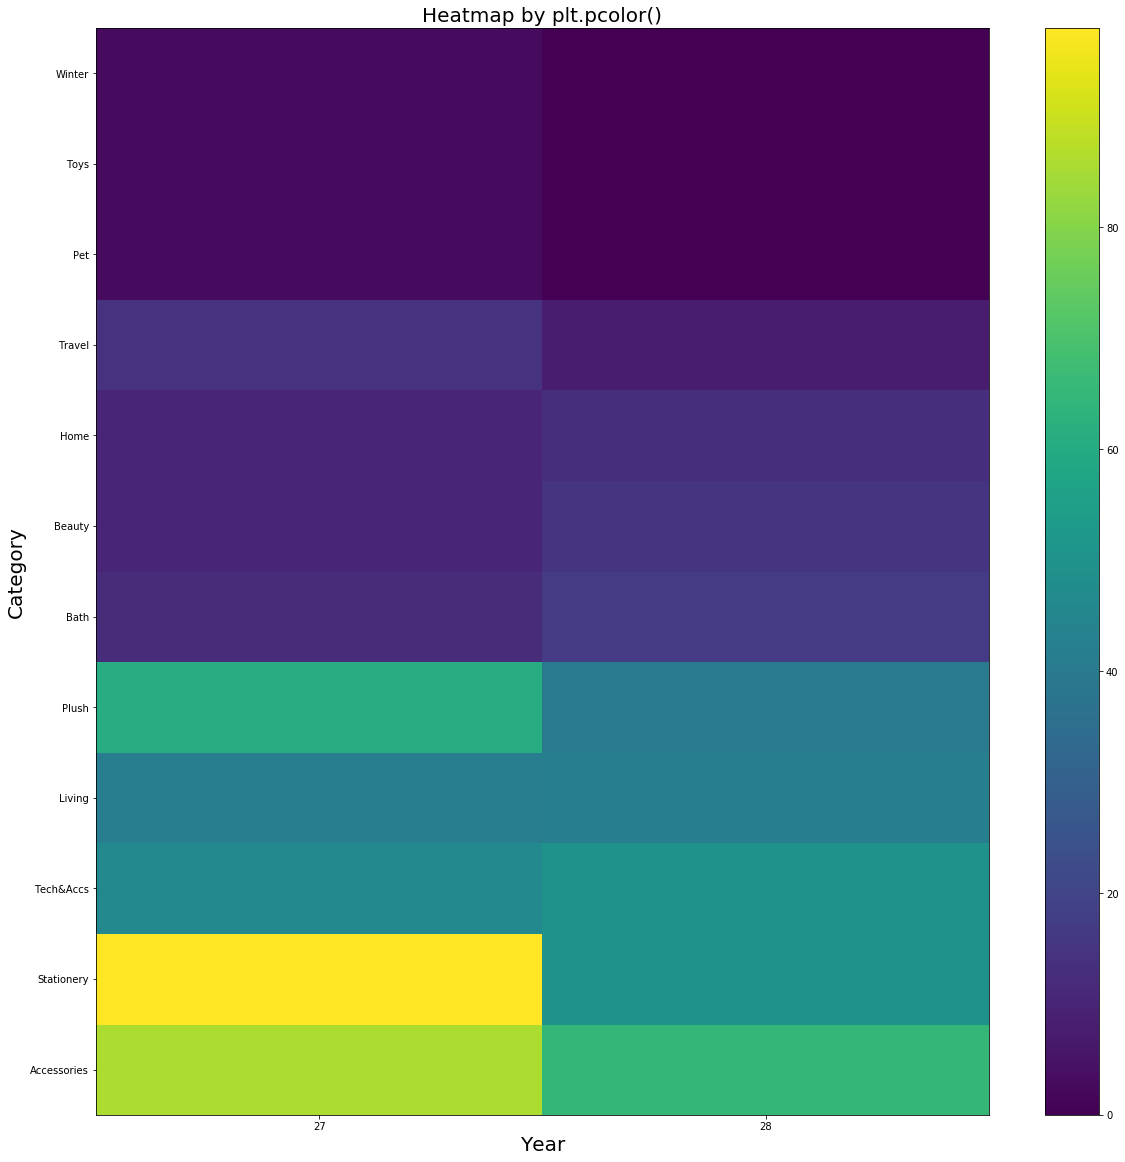

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [20, 20]

category_overall.drop('All', axis = 'columns', inplace = True)
category_overall.drop('All', axis = 'index', inplace = True)

# heatmap by plt.pcolor()
def heatmap (chart, chartsize, font_size):
    plt.rcParams['figure.figsize'] = [chartsize, chartsize]
    plt.pcolor(chart)
    plt.xticks(np.arange(0.5, len(chart.columns), 1), chart.columns)
    plt.yticks(np.arange(0.5, len(chart.index), 1), chart.index)
    plt.title('Heatmap by plt.pcolor()', fontsize=font_size)
    plt.xlabel('Year', fontsize=font_size)
    plt.ylabel('Category', fontsize=font_size)
    plt.colorbar()

heatmap(category_overall, 20, 20)
#plt.savefig('sale_per_category.png')

In [30]:
category_sale = pd.pivot_table(julysale,index = ['CATEGORY', 'ITEM', 'NAME(KR)', 'product_title' ], columns = 'dayofweek', values = 'net_quantity', aggfunc=np.sum, fill_value = 0, margins = True)

In [31]:
category_sale  = category_sale.sort_values(by = 28, ascending = False)
category_sale

dayofweek                                                                                                27  \
CATEGORY    ITEM                 NAME(KR)            product_title                                            
All                                                                                                     387   
Bath        Hairbands            베이비드리밍 세안밴드 리틀라이언   Baby Dreaming Theme, Plush Headband - Little Ryan    2   
Accessories Socks                프렌즈미디움삭스(공용)_네이비라이언 Socks, Navy - Ryan                                   3   
Plush       Face Cushions        페이스말랑쿠션_어피치         Soft Face Cushion (M) - Apeach                       3   
            Plush Toys           베이비드리밍 러블리애착인형_라이언  Baby Dreaming Theme, Plush - Little Ryan             4   
...                                                                                                     ...   
Accessories Pin badge            프렌즈뱃지_베이직 튜브        Metal Pin Badges - Tube                              2   
Stationery  Notepads             해피위크 공부노트_일 튜브      Happy Weeks, Ruled Note - Sunday Tube                4   
Travel      Luggage Tags         실리콘 전신네임택-리틀튜브      Luggage Tag - Little Tube                            1   
Home        Fans                 크레들 핸디형 선풍기_어피치     Portable Fan with Cradle Stand - Apeach              0   
Stationery  Sticky Notes & Memos 해피위크 점착메모세트         Happy Weeks, Sticky Note Set                         6   

dayofweek                                                                                                28  \
CATEGORY    ITEM                 NAME(KR)            product_title                                            
All                                                                                                     300   
Bath        Hairbands            베이비드리밍 세안밴드 리틀라이언   Baby Dreaming Theme, Plush Headband - Little Ryan    8   
Accessories Socks                프렌즈미디움삭스(공용)_네이비라이언 Socks, Navy - Ryan                                   6   
Plush       Face Cushions        페이스말랑쿠션_어피치         Soft Face Cushion (M) - Apeach                       5   
            Plush Toys           베이비드리밍 러블리애착인형_라이언  Baby Dreaming Theme, Plush - Little Ryan             5   
...                                                                                                     ...   
Accessories Pin badge            프렌즈뱃지_베이직 튜브        Metal Pin Badges - Tube                             -1   
Stationery  Notepads             해피위크 공부노트_일 튜브      Happy Weeks, Ruled Note - Sunday Tube               -1   
Travel      Luggage Tags         실리콘 전신네임택-리틀튜브      Luggage Tag - Little Tube                           -1   
Home        Fans                 크레들 핸디형 선풍기_어피치     Portable Fan with Cradle Stand - Apeach             -1   
Stationery  Sticky Notes & Memos 해피위크 점착메모세트         Happy Weeks, Sticky Note Set                        -1   

dayofweek                                                                                               All  
CATEGORY    ITEM                 NAME(KR)            product_title                                           
All                                                                                                     687  
Bath        Hairbands            베이비드리밍 세안밴드 리틀라이언   Baby Dreaming Theme, Plush Headband - Little Ryan   10  
Accessories Socks                프렌즈미디움삭스(공용)_네이비라이언 Socks, Navy - Ryan                                   9  
Plush       Face Cushions        페이스말랑쿠션_어피치         Soft Face Cushion (M) - Apeach                       8  
            Plush Toys           베이비드리밍 러블리애착인형_라이언  Baby Dreaming Theme, Plush - Little Ryan             9  
...                                                                                                     ...  
Accessories Pin badge            프렌즈뱃지_베이직 튜브        Metal Pin Badges - Tube                              1  
Stationery  Notepads             해피위크 공부노트_일 튜브      Happy Weeks, Ruled Note - Sunday Tube                3  
Travel      

In [32]:
category_sale.query("CATEGORY == ['Accessories']").head(50)

dayofweek                                                                                            27  \
CATEGORY    ITEM            NAME(KR)             product_title                                            
Accessories Socks           프렌즈미디움삭스(공용)_네이비라이언  Socks, Navy - Ryan                                   3   
            Card Wallets    목걸이카드지갑-리틀라이언        Foldable Card ID Wallet with Neck Strap - Ryan       3   
            Canvas bag      얌얌 에코백_리틀어피치         Yumyum Friends, Tote bag - Little Apeach             4   
            Socks           프렌즈미디움삭스(공용)_해피위크    Socks, Happy Week - Muzi & Con & Ryan                0   
            Card Wallets    목걸이카드지갑-리틀어피치        Foldable Card ID Wallet with Neck Strap - Apeach     3   
            Hair Tie        레몬테라스 곱창끈_라이언        Lemon Terrace, Hair Tie - Ryan                       3   
            Hoodie          강다니엘에디션 블랙후디(유니섹스)   KANGDANIEL EDITION, Embroidery Hoodie (M / L) -...   2   
            Socks           프렌즈미디움삭스(공용)_보드라이언   Socks, Board - Ryan                                  1   
                            프렌즈미디움삭스(공용)_핑크어피치   Socks, Pink - Apeach                                 4   
                            프렌즈스토리삭스(여성)_해피선데이   Low Cut Socks - Ryan & Apeach                        0   
            Cross bag       강다니엘에디션 블랙후디(여성)     KANGDANIEL EDITION, Embroidery Hoodie (M / L) -...   5   
            Keyrings        강다니엘에디션 소프트키링_윙크어피치  KANGDANIEL EDITION, Plush Keyring - Wink Apeach      2   
            Hair Tie        폼폼프렌즈 헤어스트링_곰돌이라이언   Hair band, Pompom Friends - Polar Bear Ryan          1   
                            레몬테라스 곱창끈_어피치        Lemon Terrace, Hair Tie - Apeach                     2   
            Canvas Bag      베이비드리밍 에코백 리틀라이언     Baby Dreaming Theme, Bag - Little Ryan               0   
            AirPods Keyring 하트어피치 에어팟키링          Metal Keyring - Heart Apeach                         1   
            Plush Keyring   폼폼프렌즈 미니키체인_펭귄튜브     Plush Keyring - Pompom Friends, Penguin Tube         0   
                            강다니엘에디션 페이스키체인_냥이r   KANGDANIEL EDITION, Plush Keyring - Kitten Rooney    0   
                            베이비드리밍 드림키체인_무지      Baby Dreaming Theme, Plush Keyring - Little Muzi     0   
                            베이비드리밍 드림키체인_라이언     Baby Dreaming Theme, Plush Keyring - Little Ryan     0   
            Keyrings        강다니엘에디션 투명키링_날아라냥이   KANGDANIEL EDITION, Acrylic Keyring - Flying Ap...   1   
            Plush Keyring   미니페이스키링_어피치          Mini Face Plush Keyring - Apeach                     2   
                            미니페이스키링_무지           Mini Face Plush Keyring - Muzi                       1   
            Keyrings        타이니프렌즈_프로도           Keyring - Tiny Frodo                                 0   
            Plush Keyring   강다니엘에디션 페이스키체인_냥이p   KANGDANIEL EDITION, Plush Keyring - Kitten Peter     3   
            Pouches         레이지 파우치_ivory        Lazy Sunday Pouch (Little Muzi)                      1   
            Coin Wallets    리틀프렌즈동전지갑_네오         Coin Wallet with Band - Neo                          0   
            Pouches         트와이스에디션 미니파우치세트      TWICE Edition, Mini Pouch Set - Apeach               0   
            Socks           프렌즈미디움삭스(공용)_해피토요일   Socks, Happy Saturday - Ryan & Con                   1   
            Canvas bag      얌얌 미니 에코백_리틀어피치      Yumyum Friends, Mini Tote bag - Little Apeach        0   
            Socks           프렌즈스토리삭스(여성)_레몬트리    Low Cut Socks - Ryan & Con                           1   
            Pouches         베이비드리밍 글리터파우치 리틀어피치  Baby Dreaming Theme, Glitter Pouch - Apeach          0   
                            베이비드리밍 글리터파우치 리틀라이언  Baby Dreaming Theme, Glitter Pouch - Ryan            0   
            Card Wallets    하트어피치 목걸이카드지갑        Card Holder Lanyard - Heart Apeach                   1   
            Socks           프렌즈스토리삭스(여성)_숲속라이언   Low Cut Socks - Forest Ryan                          0   
                            프렌즈스토리삭스(여성)_

In [33]:
category_sale.query("CATEGORY == ['Stationery']").head(50)

dayofweek                                                                                                    27  \
CATEGORY   ITEM                 NAME(KR)                 product_title                                            
Stationery Message Cards        리틀스케치북_카드_어피치            Cake Card - Apeach                                   4   
           Pen                  도리도리 무빙펜-라이언             Spinning Retractable Gel Pen - Ryan                  3   
           Stickers             해피위크 다이어리데코스티커           Happy Weeks, Diary Decoration Sticker                0   
           Pen                  해피위크 모나미153(4개)_어피치와 친구들 Happy Weeks, Ballpoint Pen Set, 0.7mm Black ink...   2   
           Stickers             해피위크 리무버블스티커_라이언         Happy Weeks, Removable Stickers - Ryan               1   
           Sticky Notes & Memos 어텀스토리 와글와글 떡메모지_도토리      Autumn Story Memo - Acorn                            1   
           Notepads             해피위크 A5 스프링노트_어피치        Happy Weeks, A5 Ringbound Notepad - Apeach           3   
           Stickers             해피위크 페이스스티커_어피치&무지       Happy Weeks, Face Stickers - Apeach, Muzi            0   
                                해피위크 리무버블스티커_어피치         Happy Weeks, Removable Stickers - Apeach             5   
           Pen                  해피위크 4컬러+샤프 멀티펜_어피치      Happy Weeks, Multi Coloured Pen, 4 Colours & Me...   5   
           Desk Mat             해피위크 슬림데스크매트_핑크          Happy Weeks, Desk Mat - Apeach                       0   
           Pen                  러블리어피치 클리어샤프             Mechanical Pencil - Lovely Apeach                    2   
           Notepads             해피위크 미니스프링노트_어피치         Happy Weeks, Wirebound Notepad - Apeach              0   
                                해피위크 공부노트_월 무지           Happy Weeks, Ruled Note - Monday Muzi                1   
                                해피위크 A5 스프링노트_라이언        Happy Weeks, A5 Ringbound Notepad - Ryan             1   
                                레몬테라스 노트펜세트_라이언          Lemon Terrace, Notepad & Pen Set - Ryan              0   
           Mouse Pad            해피위크 마우스패드_어피치           Happy Weeks, Mouse Pad - Apeach                      0   
           Message Cards        리틀스케치북_카드_라이언            Heart Card - Ryan                                    2   
                                리틀스케치북_카드_LOVE YOU       L.O.V.E. Card - Neo                                  1   
           Letter set           해피위크 편지지세트_라이언           Happy Weeks, Letters and Envelopes Sets - Ryan       0   
           Index Folder         해피위크 인덱스파일(1칸)_어피치       Happy Weeks, Document Index file - Apeach            0   
           Clip board           레몬테라스 a4클립보드             Lemon Terrace, A4 Clipboard                          0   
           Letter set           해피위크 편지지세트_어피치           Happy Weeks, Letters and Envelopes Sets - Apeach     4   
           Stickers             베이비드리밍 클리어데코스티커_핑크       Baby Dreaming Theme, Decoration Sticker - Pink       1   
           Pen                  베이비드리밍 데코트윈펜 5pcs 세트     Baby Dreaming Theme, Double Sided Highlighters,...   2   
                                이모티콘젤펜_리본라이언             Retractable Gel Pen - Ryan (with Ribbon)             3   
           Sticky Notes & Memos 베이비드리밍 펜홀더 메모지세트         Baby Dreaming Theme, Pen Holder & Memo               0   
           Pen                  이모티콘젤펜_리틀라이언             Retractable Gel Pen - Ryan (with Sketchbook)         1   
                                해피위크 4컬러+샤프 멀티펜_라이언      Happy Weeks, Multi Coloured Pen, 4 Colours & Me...   1   
                                해피위크 모나미153(4입)_라이언과 친구들 Happy Weeks, Ballpoint Pen Set, 0.7mm Black ink...   0   
           Pencil Sharpener     러블리어피치 연필깎이              Pencil Sharpener - Lovely Apeach                     0   
           Stickers             귀염귀염스티커_리틀네오             Decoration Sticker - Little Neo                      0   
                                베이비드리밍 클리어데코스티커_블루       Baby Dreaming Theme, Decoration S

In [34]:
category_sale.query("CATEGORY == ['Plush']").head(50)

dayofweek                                                                                     27  \
CATEGORY ITEM          NAME(KR)           product_title                                            
Plush    Face Cushions 페이스말랑쿠션_어피치        Soft Face Cushion (M) - Apeach                       3   
         Plush Toys    베이비드리밍 러블리애착인형_라이언 Baby Dreaming Theme, Plush - Little Ryan             4   
                       레몬테라스 향기인형_어피치     Lemon Terrace, Plush - Apeach                        2   
         Mini Pillow   베이비필로우_러블리어피치      Mini Pillow - Lovely Apeach                          2   
         Face Cushions 레몬테라스 얼굴쿠션_어피치     Lemon Terrace, Face Cushion - Apeach                 2   
                       미니얼굴쿠션_어피치         Soft Face Cushion - Apeach                           1   
         Mini Pillow   꿀잠베이비필로우_프로도       Mini Pillow - Little Frodo                           0   
         Body Pillow   리틀바디필로우_튜브         Soft Body Pillow - Tube                              0   
                       후디바디필로우_무지앤콘       Hoodie Body Pillow - Muzi & Con                      2   
         Face Cushions 레몬테라스 얼굴쿠션_라이언     Lemon Terrace, Face Cushion - Ryan                   2   
         Plush Toys    윈터원더랜드 미니쿠키라이언     Winter Wonderland Collection, Plush - Mini Cook...   0   
                       어텀스토리 다람쥐패밀리       Autumn Story Plush Set - Squirrel Family             4   
         Face Cushions 미니얼굴쿠션_네오          Soft Face Cushion - Neo                              0   
         Plush Toys    포레스트_라이언인형         Forest Theme, Plush - Ryan                           0   
         Body Pillow   후디바디필로우_어피치        Hoodie Body Pillow - Apeach                          2   
                       말랑허그바디쿠션_라이언       Hugging Body Pillow - Ryan                           0   
                       리틀바디필로우_어피치        Soft Body Pillow - Apeach                            1   
         Plush Toys    레몬테라스 향기인형_라이언     Lemon Terrace, Plush - Ryan                          4   
                       아장아장프렌즈_튜브         Plush - Tube                                         1   
                       아장아장프렌즈_네오         Plush - Neo                                          1   
                       베이비드리밍 러블리애착인형_프로도 Baby Dreaming Theme, Plush - Little Frodo            1   
                       베이비드리밍 러블리애착인형_튜브  Baby Dreaming Theme, Plush - Little Tube             1   
                       베이비드리밍 러블리애착인형_어피치 Baby Dreaming Theme, Plush - Little Apeach           1   
         Mini Pillow   베이비필로우_러블리라이언      Mini Pillow - Lovely Ryan                            0   
                       베이비드리밍 타이니프렌즈_프로도  Baby Dreaming Theme, Mini Pillow - Little Frodo      2   
                       베이비드리밍 타이니프렌즈_어피치  Baby Dreaming Theme, Mini Pillow - Little Apeach     3   
                       베이비드리밍 타이니프렌즈_네오   Baby Dreaming Theme, Mini Pillow - Little Neo        1   
                       꿀잠베이비필로우_튜브        Mini Pillow - Little Tube                            1   
         Face Cushions 미니얼굴쿠션_제이지         Soft Face Cushion - Jay-G                            1   
         Body Pillow   리틀바디필로우_라이언        Soft Body Pillow - Ryan                              3   
         Body pillow   말랑허그바디쿠션_어피치       Hugging Body Pillow - Apeach                         0   
                       강다니엘에디션 바디필로우      KANGDANIEL EDITION, Body Pillow - Apeach            10   
         Mini Pillow   베이비드리밍 타이니프렌즈_라이언  Baby Dreaming Theme, Mini Pillow - Little Ryan       5   
         Body Pillow   리틀바디필로우_프로도        Soft Body Pillow - Frodo                             1   

dayofweek                                                                                     28  \
CATEGORY ITEM          NAME(KR)           product_title                                            
Plush    Face Cushions 페이스말랑쿠션_어피치        Soft Face Cushion (M) - Apeach                       5   
         Plush Toys    베이비드리밍 러블리애착인형_라이언 Baby Dreaming Theme, Plush - Little Ryan             5   

In [35]:
category_sale.query("CATEGORY == ['Tech&Accs']").head(50)

dayofweek                                                                                                              27  \
CATEGORY  ITEM              NAME(KR)                               product_title                                            
Tech&Accs Airpods case      에어팟케이스 해피위크_어피치                        Happy Weeks, AirPods Case - Apeach                   2   
          Airpods Pouch     미니파우치 라이언                              Mini Pouch - Ryan                                    0   
          Airpods case      에어팟프로 케이스_리틀라이언                        Silicone AirPods Pro Case - Little Ryan              0   
          Mouse Pad         해피위크 마우스패드_무지                          Happy Weeks, Mouse Pad - Muzi                        0   
          USB Cables & Accs 마그네틱케이블홀더_리틀어피치                        Magnetic Cable Clip - Little Apeach                  2   
                            마그네틱케이블홀더_리틀제이지                        Magnetic Cable Clip - Little Jay-G                   2   
          Mouse Pad         해피위크 마우스패드_라이언                         Happy Weeks, Mouse Pad - Ryan                        2   
          Buzz case         버즈케이스_리틀라이언                            Buds & Buds Plus Case - Ryan                         2   
          Airpods case      에어팟프로케이스 해피위크_어피치                      Happy Weeks, AirPods Pro Case - Apeach               2   
                            에어팟프로 케이스 핑거링세트 리틀라이언                  AirPods Pro Case Cover with Keyring -Little Ryan     0   
          Airpods Keyring   에어팟키링-리틀무지                             Keyring for AirPods cases - Little Muzi              0   
          USB Cables & Accs [5pin]케이블보호캡-리틀라이언                     USB A to Mini USB B Android Cable With Protecto...   0   
          Airpods case      에어팟프로 케이스 핑거링세트 리틀어피치                  AirPods Pro Case Cover with Keyring -Little Apeach   1   
          Buzz case         버즈케이스_리틀어피치                            Buds & Buds Plus Case - Apeach                       1   
          Phone Cases       (I11)PU카드케이스_콘                         Phonecase ( iPhone 11 / iPhone 11 Pro) - Con         0   
                            (I11)베이비드리밍 TPU케이스 리틀프렌즈               Baby Dreaming Theme, iPhone Case (X,XS / 11 / 1...   1   
                            (IX/XS)베이비드리밍 TPU케이스 리틀프렌즈             Baby Dreaming Theme, iPhone Case (X,XS / 11 / 1...   0   
                            (IX/XS)베이비드리밍 스트랩케이스 리틀라이언             Baby Dreaming Theme, iPhone Case with Strap X/X...   0   
                            KAKAO FRIENDS (IX/XS)베이비드리밍 TPU케이스 라이언 Baby Dreaming Theme, iPhone Case (X,XS / 11 / 1...   0   
                            팝소켓_베이직페이스 (라이언)                       Popsockets - Ryan                                    1   
          USB Cables & Accs [8pin]케이블보호캡-리틀무지                      USB A to Apple Lightning Cable with Protector -...   2   
          Airpods case      에어팟케이스_리본어피치                           Airpods Case Cover - Ribbon Apeach                   0   
          USB Cables & Accs [8pin]케이블보호캡-리틀튜브                      USB A to Apple Lightning Cable with Protector -...   1   
          Airpods case      에어팟케이스_리틀라이언                           Basic AirPods Case - Little Ryan                     0   
                            에어팟케이스 해피위크_라이언                        Happy Weeks, AirPods Case - Ryan                     0   
                            에어팟케이스 핑거링세트 라이언                       AirPods Case Cover with Keyring -Ryan                0   
          Airpods Keyring   베이비드리밍 에어팟키링 리틀라이언                     Baby Dreaming Theme, Keyring - Little Ryan           0   
                            베이비드리밍 에어팟키링 리틀어피치                     Baby Dreaming Theme, Keyring - Little Apeach         0   
                            에어팟 피규어 키링-어피치                         Keyring - Peach Apeach                               1   
                            에어팟키링_허니라이언                            Keyring for AirPods cases - Honey Ryan               0   


In [36]:
category_sale.query("CATEGORY == ['Living']").head(50)

dayofweek                                                                                              27  \
CATEGORY ITEM                 NAME(KR)             product_title                                            
Living   Tumblers             강다니엘에디션 쉐이크텀블러 750ml KANGDANIEL EDITION, Shake Tumbler, 750ml - Apeach    2   
         Body Pillow          후디바디필로우_라이언          Hoodie Body Pillow - Ryan                            5   
         Coin Wallets         얌얌 동전지갑_리틀라이언        Yumyum Friends, Coin Wallet - Little Ryan            2   
         Wallets              하트어피치 중지갑            Wallet - Heart Apeach                                5   
         Handkerchief         손수건_허니프렌즈_어피치        Handkerchief - Honey Bee Apeach                      0   
         Umbrellas            레이지선데이 3단우산 무지       Lazy Sunday Umbrella - Muzi                          0   
         Mugs                 포레스트_그린머그_라이언        Forest Theme, Green Mug - Ryan                       1   
         Bed Socks            폼폼프렌즈 중목수면양말_어피치     Slumber Socks, Pompom Friends - Apeach               0   
         Sleeping Masks       말랑 페이스형안대 리틀라이언      Sleeping Mask - Little Ryan                          1   
                              러블리어피치 수면안대+파우치세트_퍼플 Sleeping Mask and Pouch Set, Purple                  1   
         Rugs                 폼폼프렌즈 미니러그_어피치       Pompom Friends, Rug - Apeach                         0   
         Pyjamas              폼폼프렌즈 후드 상하의 세트_라이언  Hoody Pyjama - Pompom Friends, Ryan                  0   
                              베이비드리밍 빅페이스파자마(여성)   Baby Dreaming Theme, Pyjama Set - Little Apeach      0   
                              레몬테라스 레몬원피스파자마_어피치   Lemon Terrace, Pyjama Dress - Apeach                 0   
                              레몬테라스 라임파자마세트_라이언    Lemon Terrace, Pyjama Set - Ryan                     1   
         Mugs                 화이트머그_라이언            Basic White Mug - Ryan                               0   
                              치즈_피규어코스터머그_어피치      Cheese Friends, Mug with Coaster (Inc. Figurine...   1   
                              치즈_피규어코스터머그_라이언      Cheese Friends, Mug with Coaster (Inc. Figurine...   1   
         Mobile Number Plates 피규어주차번호판_라이언         Mobile Number Plate - Ryan                           0   
         Card Wallets         하트어피치 카드지갑           Card Holder - Heart Apeach                           2   
         Handkerchief         손수건_허니프렌즈_라이언        Handkerchief - Honey Bee Ryan                        0   
         Rubbish Bin          데스크휴지통_리틀라이언         Mini Desktop Rubbish Bin - Little Ryan               1   
         Pyjamas              폼폼프렌즈 패턴 상하의 파자마(여)  Pyjama - Pompom Friends, Apeach                      0   
         Chair Pad            메모리폼방석_치즈볼라이언        Memory Foam Seat Cushion Pad- Cheeseball Ryan        0   
         Slippers             포레스트_슬리퍼_아이보리        Forest Theme, Ivory Slippers - Ryan                  1   
         Mugs                 포레스트_오렌지머그_라이언       Forest Theme, Orange Mug - Ryan                      2   
         Pyjamas              레몬테라스 레몬파자마세트_어피치    Lemon Terrace, Pyjama Set - Apeach                   2   
                              베이비드리밍 키즈파자마_어피치(m)  Baby Dreaming Theme, Kids Pyjama - Little Apeach     1   
         Rugs                 폼폼프렌즈 미니러그_라이언       Pompom Friends, Rug - Ryan                           1   
         Sleeping Masks       러블리어피치 수면안대+파우치세트_핑크 Sleeping Mask and Pouch Set, Pink                    2   
         Tumblers             페이스스텐보틀300ml_어피치     Face Stainless Bottle - Apeach                       1   
                              화이트스텐텀블러_라이언         Basic Stainless Tumbler - Ryan, White                1   
         Umbrellas            5단우산 라이언             Umbrella - Ryan                                      1   
                              레이지선데이 3단우산 라이언      Lazy Sunday Umbrella - Ryan                          2   
         Mugs                 블랙머그_라이언             Basic Black Mug - Ryan   

In [37]:
category_sale.query("CATEGORY == ['Home']").head(50)

dayofweek                                                                           27  \
CATEGORY ITEM              NAME(KR)        product_title                                 
Home     Humidifier Filter 프렌즈 가습기 필터      Humidifier Filters, Pack of 3             1   
         Humidifier        리틀어피치 가습기       Humidifier - Little Apeach                0   
                           리틀라이언 가습기       Humidifier - Little Ryan                  0   
         Mood Lamp         실리콘무드등_리틀어피치    Silicone Mood Lamp - Little Apeach        0   
                           실리콘무드등_리틀라이언    Silicone Mood Lamp - Little Ryan          1   
         Desk Humidifier   어피치 가습기         Humidifier - Apeach                       4   
                           라이언 가습기         Humidifier - Ryan                         0   
         Fans              크레들 핸디형 선풍기_라이언 Portable Fan with Cradle Stand - Ryan     4   
                           크레들 핸디형 선풍기_어피치 Portable Fan with Cradle Stand - Apeach   0   

dayofweek                                                                           28  \
CATEGORY ITEM              NAME(KR)        product_title                                 
Home     Humidifier Filter 프렌즈 가습기 필터      Humidifier Filters, Pack of 3             3   
         Humidifier        리틀어피치 가습기       Humidifier - Little Apeach                2   
                           리틀라이언 가습기       Humidifier - Little Ryan                  2   
         Mood Lamp         실리콘무드등_리틀어피치    Silicone Mood Lamp - Little Apeach        2   
                           실리콘무드등_리틀라이언    Silicone Mood Lamp - Little Ryan          2   
         Desk Humidifier   어피치 가습기         Humidifier - Apeach                       2   
                           라이언 가습기         Humidifier - Ryan                         2   
         Fans              크레들 핸디형 선풍기_라이언 Portable Fan with Cradle Stand - Ryan    -1   
                           크레들 핸디형 선풍기_어피치 Portable Fan with Cradle Stand - Apeach  -1   

dayofweek                                                                           All  
CATEGORY ITEM              NAME(KR)        product_title                                 
Home     Humidifier Filter 프렌즈 가습기 필터      Humidifier Filters, Pack of 3              4  
         Humidifier        리틀어피치 가습기       Humidifier - Little Apeach                 2  
                           리틀라이언 가습기       Humidifier - Little Ryan                   2  
         Mood Lamp         실리콘무드등_리틀어피치    Silicone Mood Lamp - Little Apeach         2  
                           실리콘무드등_리틀라이언    Silicone Mood Lamp - Little Ryan           3  
         Desk Humidifier   어피치 가습기         Humidifier - Apeach                        6  
                           라이언 가습기         Humidifier - Ryan                          2  
         Fans              크레들 핸디형 선풍기_라이언 Portable Fan with Cradle Stand - Ryan      3  
                           크레들 핸디형 선풍기_어피치 Portable Fan with Cradle Stand - Apeach   -1

In [38]:
character_sale = pd.pivot_table(julysale,index = ['CHARACTER', 'ITEM', 'NAME(KR)','product_title'], columns = 'dayofweek', values = 'net_quantity', aggfunc=np.sum, fill_value = 0, margins = True)

In [39]:
character_sale.sort_values(by = 27, ascending = False)

,,,dayofweek,27,28,All
CHARACTER,ITEM,NAME(KR),product_title,,,
All,,,,387,300,687
Apeach,Body pillow,강다니엘에디션 바디필로우,"KANGDANIEL EDITION, Body Pillow - Apeach",10,0,10
"Ryan, Apeach, Con",Message Cards,리틀스케치북_카드_생일축하,"Cake Card - Apeach, Ryan, Frodo",7,0,7
Ryan,Sticky Notes & Memos,해피위크 점착메모세트,"Happy Weeks, Sticky Note Set",6,-1,5
Apeach,Pen,해피위크 4컬러+샤프 멀티펜_어피치,"Happy Weeks, Multi Coloured Pen, 4 Colours & Mechanical Pencil (Apeach)",5,2,7
...,...,...,...,...,...,...
Ryan,Mugs,화이트머그_라이언,Basic White Mug - Ryan,0,1,1
Apeach,Travel Pouches,클리어파우치 4P SET-리틀어피치,Zipper Pouch Set of 4 - Little Apeach,0,1,1
"Apeach, Muzi",Stickers,해피위크 페이스스티커_어피치&무지,"Happy Weeks, Face Stickers - Apeach, Muzi",0,2,2


In [40]:
Ryan_sale = character_sale.query("CHARACTER == ['Ryan']").head(50)

In [41]:
Ryan_sale = Ryan_sale.sort_values(by = 27 , ascending = False)
Ryan_sale.head(100)

dayofweek                                                                                                    27  \
CHARACTER ITEM                 NAME(KR)                  product_title                                            
Ryan      Mini Pillow          베이비드리밍 타이니프렌즈_라이언         Baby Dreaming Theme, Mini Pillow - Little Ryan       5   
          Body Pillow          후디바디필로우_라이언               Hoodie Body Pillow - Ryan                            5   
          Fans                 크레들 핸디형 선풍기_라이언           Portable Fan with Cradle Stand - Ryan                4   
          Airpods case         얌얌 에어팟케이스_리틀라이언           Yumyum Friends, AirPods Case- Little Ryan            3   
          Hair Tie             레몬테라스 곱창끈_라이언             Lemon Terrace, Hair Tie - Ryan                       3   
          Mugs                 블랙머그_라이언                  Basic Black Mug - Ryan                               3   
          Body Pillow          리틀바디필로우_라이언               Soft Body Pillow - Ryan                              3   
          Card Wallets         목걸이카드지갑-리틀라이언             Foldable Card ID Wallet with Neck Strap - Ryan       3   
          Face Cushions        레몬테라스 얼굴쿠션_라이언            Lemon Terrace, Face Cushion - Ryan                   2   
          Hairbands            베이비드리밍 세안밴드 리틀라이언         Baby Dreaming Theme, Plush Headband - Little Ryan    2   
          Hair Velcro          베이비드리밍 헤어벨크로 2P SET 리틀라이언 Baby Dreaming Theme, Hair Velcro, Pack of 2 - L...   2   
          Glove Mitts          엄지장갑 라이언                  Faux Fur Gloves - Ryan                               2   
          Coin Wallets         얌얌 동전지갑_리틀라이언             Yumyum Friends, Coin Wallet - Little Ryan            2   
          Card Wallets         베이직카드지갑 라이언               Basic Card Holder - Ryan                             2   
          Buzz case            버즈케이스_리틀라이언               Buds & Buds Plus Case - Ryan                         2   
          Mugs                 포레스트_오렌지머그_라이언            Forest Theme, Orange Mug - Ryan                      2   
          Mouse Pad            해피위크 마우스패드_라이언            Happy Weeks, Mouse Pad - Ryan                        2   
          Keyrings             피규어키링-리본라이언               Keyring - Ryan (with Ribbon)                         1   
          Mugs                 포레스트_그린머그_라이언             Forest Theme, Green Mug - Ryan                       1   
          Hair Tie             폼폼프렌즈 헤어스트링_곰돌이라이언        Hair band, Pompom Friends - Polar Bear Ryan          1   
          Mugs                 치즈_피규어코스터머그_라이언           Cheese Friends, Mug with Coaster (Inc. Figurine...   1   
          Figures              프라모델_라이언(무지&튜브)           Decoration Figure - Ryan                             1   
                               컵위의 피규어-후디라이언             Figurine Decoration for Cup - Hoodie Ryan            1   
          Mood Lamp            실리콘무드등_리틀라이언              Silicone Mood Lamp - Little Ryan                     1   
          Ear Muff             폼폼 귀마개 라이언                Earmuffs - Ryan                                      1   
          Canvas bag           얌얌 미니 에코백_리틀라이언           Yumyum Friends, Mini Tote bag - Little Ryan          1   
          Diary set            2020 다이어리캘린더 세트_라이언       2020 Diary Set - Ryan (Korean Holiday Ver.)          1   
          Coin Wallets         치즈 동전지갑 라이언               Cheese Friends, Coin Wallet - Ryan                   1   
                               구슬동전지갑-리틀라이언              Coin Wallet with Key Ring - Ryan                     1   
          Luggage Tags         실리콘 전신네임택-리틀라이언           Luggage Tag - Little Ryan                            1   
          Index Folder         해피위크 지퍼파일_라이언             Happy Weeks, Zipper File Folder - Ryan               1   
          Letter set           해피위크 편지지세트_라이언            Happy Weeks, Letters and Envelopes Sets - Ryan       0   
          Mobile Number Plates 피규어주차번호판_라이언              Mobile Number Plate - Ryan       

In [42]:
Apeach_sale = character_sale.query("CHARACTER == ['Apeach']").head(50)
Apeach_sale = Apeach_sale.sort_values(by = 27, ascending = False)
Apeach_sale

dayofweek                                                                                             27  \
CHARACTER ITEM            NAME(KR)                product_title                                            
Apeach    Body pillow     강다니엘에디션 바디필로우           KANGDANIEL EDITION, Body Pillow - Apeach            10   
          Cross bag       강다니엘에디션 블랙후디(여성)        KANGDANIEL EDITION, Embroidery Hoodie (M / L) -...   5   
          Hairbands       베이비드리밍 세안밴드 리틀어피치       Baby Dreaming Theme, Plush Headband - Little Ap...   4   
          Canvas bag      얌얌 에코백_리틀어피치            Yumyum Friends, Tote bag - Little Apeach             4   
          Desk Humidifier 어피치 가습기                 Humidifier - Apeach                                  4   
          Card Wallets    목걸이카드지갑-리틀어피치           Foldable Card ID Wallet with Neck Strap - Apeach     3   
          Hairbands       레몬테라스 세안밴드_어피치          Lemon Terrace, Headband - Apeach                     3   
          Cosmetics Puff  베이비드리밍 논라텍스퍼프 2P SET    Baby Dreaming Theme, Makeup Blender  -  Apeach       3   
          Face Cushions   페이스말랑쿠션_어피치             Soft Face Cushion (M) - Apeach                       3   
          Keyrings        강다니엘에디션 소프트키링_윙크어피치     KANGDANIEL EDITION, Plush Keyring - Wink Apeach      2   
          Body Pillow     후디바디필로우_어피치             Hoodie Body Pillow - Apeach                          2   
          Cross bag       크로스백 어피치                Cross Bag - Pink, Apeach                             2   
          Face Cushions   레몬테라스 얼굴쿠션_어피치          Lemon Terrace, Face Cushion - Apeach                 2   
          Brush           러블리어피치_포켓브러쉬            Compact Brush and Mirror - Apeach                    2   
          Card Wallets    하트어피치 카드지갑              Card Holder - Heart Apeach                           2   
          Hair Pin        러블리어피치 미니집게핀 2P         Hair Clips, Pack of 2 - Apeach                       2   
          Airpods case    에어팟프로케이스 해피위크_어피치       Happy Weeks, AirPods Pro Case - Apeach               2   
          Hair Tie        레몬테라스 곱창끈_어피치           Lemon Terrace, Hair Tie - Apeach                     2   
                          폼폼프렌즈 헤어스트링_토끼어피치       Hair band, Pompom Friends - Rabbit Apeach            2   
          Airpods case    에어팟케이스 해피위크_어피치         Happy Weeks, AirPods Case - Apeach                   2   
          Hoodie          강다니엘에디션 블랙후디(유니섹스)      KANGDANIEL EDITION, Embroidery Hoodie (M / L) -...   2   
          Face Cushions   미니얼굴쿠션_어피치              Soft Face Cushion - Apeach                           1   
          Hairbands       러블리어피치 세안밴드_라벤더         Headband with Ribbon Lavender for Makeup Facial...   1   
          Index Folder    해피위크 지퍼파일_어피치           Happy Weeks, Zipper File Folder - Apeach             1   
          Figures         강다니엘에디션 피규어_캐츠 인 카트     KANGDANIEL EDITION, Figurine - Kittens in the Cart   1   
          AirPods Keyring 하트어피치 에어팟키링             Metal Keyring - Heart Apeach                         1   
          Airpods Keyring 에어팟 피규어 키링-어피치          Keyring - Peach Apeach                               1   
          Buzz case       버즈케이스_리틀어피치             Buds & Buds Plus Case - Apeach                       1   
          Airpods Pouch   미니파우치 어피치               Mini Pouch - Apeach                                  1   
          Body Pillow     리틀바디필로우_어피치             Soft Body Pillow - Apeach                            1   
          Airpods case    베이비드리밍 글리터 에어팟케이스 - 어피치 Baby Dreaming Theme, Glitter AirPods Case - Lit...   1   
          Bed Socks       폼폼프렌즈 수면덧신_토끼어피치        Non-slip Socks, Pompom Friends - Rabbit Apeach       1   
          Airpods case    에어팟 파우치 PU 어피치          PU AirPods Case - Little Apeach                      1   
          Card Wallets    하트어피치 목걸이카드지갑           Card Holder Lanyard - Heart Apeach                   1   
          Airpods case    에어팟프로 케이스 핑거링세트 리틀어피치   AirPods Pro Case Cover with Keyring -Little Apeach   1   
    

In [43]:
Muzicon_sale = character_sale.query("CHARACTER == ['Muzi']").head(50)
Muzicon_sale = Muzicon_sale.sort_values(by = 27, ascending = False)
Muzicon_sale

dayofweek                                                                                          27  \
CHARACTER ITEM              NAME(KR)           product_title                                            
Muzi      Pen               해피위크 4컬러+샤프 멀티펜_무지 Happy Weeks, Multi Coloured Pen, 4 Colours & Me...   3   
          USB Cables & Accs [8pin]케이블보호캡-리틀무지  USB A to Apple Lightning Cable with Protector -...   2   
          Index Folder      해피위크 인덱스파일(3칸)_무지  Happy Weeks, Document Index file - Muzi              1   
          Keyrings          타이니프렌즈_무지          Keyring - Tiny Muzi                                  1   
          Notepads          해피위크 공부노트_월 무지     Happy Weeks, Ruled Note - Monday Muzi                1   
          Pencil Cases      리틀프렌즈전신필통_무지       Plush Pencil Case - Muzi                             1   
          Plush Keyring     미니페이스키링_리틀무지       Mini Face Plush Keyring - Little Muzi                1   
                            미니페이스키링_무지         Mini Face Plush Keyring - Muzi                       1   
          USB Cables & Accs [5pin]케이블보호캡-리틀무지  USB A to Mini USB B Android Cable With Protecto...   1   
          Airpods Keyring   에어팟키링-리틀무지         Keyring for AirPods cases - Little Muzi              0   
          Mouse Pad         해피위크 마우스패드_무지      Happy Weeks, Mouse Pad - Muzi                        0   
          Plush Keyring     베이비드리밍 드림키체인_무지    Baby Dreaming Theme, Plush Keyring - Little Muzi     0   
          Umbrellas         레이지선데이 3단우산 무지     Lazy Sunday Umbrella - Muzi                          0   

dayofweek                                                                                          28  \
CHARACTER ITEM              NAME(KR)           product_title                                            
Muzi      Pen               해피위크 4컬러+샤프 멀티펜_무지 Happy Weeks, Multi Coloured Pen, 4 Colours & Me...   0   
          USB Cables & Accs [8pin]케이블보호캡-리틀무지  USB A to Apple Lightning Cable with Protector -...   1   
          Index Folder      해피위크 인덱스파일(3칸)_무지  Happy Weeks, Document Index file - Muzi              0   
          Keyrings          타이니프렌즈_무지          Keyring - Tiny Muzi                                  0   
          Notepads          해피위크 공부노트_월 무지     Happy Weeks, Ruled Note - Monday Muzi                1   
          Pencil Cases      리틀프렌즈전신필통_무지       Plush Pencil Case - Muzi                             0   
          Plush Keyring     미니페이스키링_리틀무지       Mini Face Plush Keyring - Little Muzi                0   
                            미니페이스키링_무지         Mini Face Plush Keyring - Muzi                       1   
          USB Cables & Accs [5pin]케이블보호캡-리틀무지  USB A to Mini USB B Android Cable With Protecto...   0   
          Airpods Keyring   에어팟키링-리틀무지         Keyring for AirPods cases - Little Muzi              2   
          Mouse Pad         해피위크 마우스패드_무지      Happy Weeks, Mouse Pad - Muzi                        3   
          Plush Keyring     베이비드리밍 드림키체인_무지    Baby Dreaming Theme, Plush Keyring - Little Muzi     1   
          Umbrellas         레이지선데이 3단우산 무지     Lazy Sunday Umbrella - Muzi                          2   

dayofweek                                                                                          All  
CHARACTER ITEM              NAME(KR)           product_title                                            
Muzi      Pen               해피위크 4컬러+샤프 멀티펜_무지 Happy Weeks, Multi Coloured Pen, 4 Colours & Me...    3  
          USB Cables & Accs [8pin]케이블보호캡-리틀무지  USB A to Apple Lightning Cable with Protector -...    3  
          Index Folder      해피위크 인덱스파일(3칸)_무지  Happy Weeks, Document Index file - Muzi               1  
          Keyrings          타이니프렌즈_무지          Keyring - Tiny Muzi                                   1  
          Notepads          해피위크 공부노트_월 무지     Happy Weeks, Ruled Note - Monday Muzi                 2  
          Pencil Cases      리틀프렌즈전신필통_무지       Plush Pencil Case - Muzi                              1  
        

In [44]:
Neo_sale = character_sale.query("CHARACTER == ['Neo']").head(50)
Neo_sale = Neo_sale.sort_values(by = 27, ascending = False)
Neo_sale

dayofweek                                                                                     27  \
CHARACTER ITEM          NAME(KR)          product_title                                            
Neo       Luggage Tags  실리콘 전신네임택-리틀네오    Luggage Tag - Little Neo                             1   
          Message Cards 윈터원더랜드 프로도&네오 카드  Winter Wonderland Collection, Card - Frodo & Neo     1   
          Mini Pillow   베이비드리밍 타이니프렌즈_네오  Baby Dreaming Theme, Mini Pillow - Little Neo        1   
          Plush Toys    아장아장프렌즈_네오        Plush - Neo                                          1   
          Coin Wallets  리틀프렌즈동전지갑_네오      Coin Wallet with Band - Neo                          0   
          Face Cushions 미니얼굴쿠션_네오         Soft Face Cushion - Neo                              0   
          Mirrors       베이비드리밍 글리터거울 리틀네오 Baby Dreaming Theme, Compact Glitter Mirror - L...   0   
                        페이스미니손거울-리틀네오     Compact Handheld Silicone Mirror - Neo               0   
          Stickers      귀염귀염스티커_리틀네오      Decoration Sticker - Little Neo                      0   

dayofweek                                                                                     28  \
CHARACTER ITEM          NAME(KR)          product_title                                            
Neo       Luggage Tags  실리콘 전신네임택-리틀네오    Luggage Tag - Little Neo                             0   
          Message Cards 윈터원더랜드 프로도&네오 카드  Winter Wonderland Collection, Card - Frodo & Neo     0   
          Mini Pillow   베이비드리밍 타이니프렌즈_네오  Baby Dreaming Theme, Mini Pillow - Little Neo        0   
          Plush Toys    아장아장프렌즈_네오        Plush - Neo                                          0   
          Coin Wallets  리틀프렌즈동전지갑_네오      Coin Wallet with Band - Neo                          1   
          Face Cushions 미니얼굴쿠션_네오         Soft Face Cushion - Neo                              1   
          Mirrors       베이비드리밍 글리터거울 리틀네오 Baby Dreaming Theme, Compact Glitter Mirror - L...   2   
                        페이스미니손거울-리틀네오     Compact Handheld Silicone Mirror - Neo               1   
          Stickers      귀염귀염스티커_리틀네오      Decoration Sticker - Little Neo                      1   

dayofweek                                                                                     All  
CHARACTER ITEM          NAME(KR)          product_title                                            
Neo       Luggage Tags  실리콘 전신네임택-리틀네오    Luggage Tag - Little Neo                              1  
          Message Cards 윈터원더랜드 프로도&네오 카드  Winter Wonderland Collection, Card - Frodo & Neo      1  
          Mini Pillow   베이비드리밍 타이니프렌즈_네오  Baby Dreaming Theme, Mini Pillow - Little Neo         1  
          Plush Toys    아장아장프렌즈_네오        Plush - Neo                                           1  
          Coin Wallets  리틀프렌즈동전지갑_네오      Coin Wallet with Band - Neo                           1  
          Face Cushions 미니얼굴쿠션_네오         Soft Face Cushion - Neo                               1  
          Mirrors       베이비드리밍 글리터거울 리틀네오 Baby Dreaming Theme, Compact Glitter Mirror - L...    2  
                        페이스미니손거울-리틀네오     Compact Handheld Silicone Mirror - Neo                1  
          Stickers      귀염귀염스티커_리틀네오      Decoration Sticker - Little Neo                       1

In [45]:
Frodo_sale = character_sale.query("CHARACTER == ['Frodo']").head(50)
Frodo_sale = Frodo_sale.sort_values(by = 27, ascending = False)
Frodo_sale

dayofweek                                                                                 27  \
CHARACTER ITEM        NAME(KR)           product_title                                         
Frodo     Mini Pillow 베이비드리밍 타이니프렌즈_프로도  Baby Dreaming Theme, Mini Pillow - Little Frodo   2   
          Body Pillow 리틀바디필로우_프로도        Soft Body Pillow - Frodo                          1   
          Notepads    해피위크 A5 스프링노트_프로도  Happy Weeks, A5 Ringbound Notepad - Frodo         1   
          Plush Toys  베이비드리밍 러블리애착인형_프로도 Baby Dreaming Theme, Plush - Little Frodo         1   
          Keyrings    타이니프렌즈_프로도         Keyring - Tiny Frodo                              0   
          Mini Pillow 꿀잠베이비필로우_프로도       Mini Pillow - Little Frodo                        0   

dayofweek                                                                                 28  \
CHARACTER ITEM        NAME(KR)           product_title                                         
Frodo     Mini Pillow 베이비드리밍 타이니프렌즈_프로도  Baby Dreaming Theme, Mini Pillow - Little Frodo   0   
          Body Pillow 리틀바디필로우_프로도        Soft Body Pillow - Frodo                          0   
          Notepads    해피위크 A5 스프링노트_프로도  Happy Weeks, A5 Ringbound Notepad - Frodo         0   
          Plush Toys  베이비드리밍 러블리애착인형_프로도 Baby Dreaming Theme, Plush - Little Frodo         0   
          Keyrings    타이니프렌즈_프로도         Keyring - Tiny Frodo                              1   
          Mini Pillow 꿀잠베이비필로우_프로도       Mini Pillow - Little Frodo                        2   

dayofweek                                                                                 All  
CHARACTER ITEM        NAME(KR)           product_title                                         
Frodo     Mini Pillow 베이비드리밍 타이니프렌즈_프로도  Baby Dreaming Theme, Mini Pillow - Little Frodo    2  
          Body Pillow 리틀바디필로우_프로도        Soft Body Pillow - Frodo                           1  
          Notepads    해피위크 A5 스프링노트_프로도  Happy Weeks, A5 Ringbound Notepad - Frodo          1  
          Plush Toys  베이비드리밍 러블리애착인형_프로도 Baby Dreaming Theme, Plush - Little Frodo          1  
          Keyrings    타이니프렌즈_프로도         Keyring - Tiny Frodo                               1  
          Mini Pillow 꿀잠베이비필로우_프로도       Mini Pillow - Little Frodo                         2

In [46]:
Tube_sale = character_sale.query("CHARACTER == ['Tube']").head(50)
Tube_sale = Tube_sale.sort_values(by = 27, ascending = False)
Tube_sale

dayofweek                                                                                         27  \
CHARACTER ITEM              NAME(KR)          product_title                                            
Tube      Notepads          해피위크 공부노트_일 튜브    Happy Weeks, Ruled Note - Sunday Tube                4   
          Airpods Keyring   에어팟 피규어 키링-튜브     Keyring - Hoodie Tube                                2   
          Pin badge         프렌즈뱃지_베이직 튜브      Metal Pin Badges - Tube                              2   
          Luggage Tags      실리콘 전신네임택-리틀튜브    Luggage Tag - Little Tube                            1   
          Mini Pillow       꿀잠베이비필로우_튜브       Mini Pillow - Little Tube                            1   
          Notepads          해피위크 A5 스프링노트_튜브  Happy Weeks, A5 Ringbound Notepad - Tube             1   
          Plush Toys        베이비드리밍 러블리애착인형_튜브 Baby Dreaming Theme, Plush - Little Tube             1   
                            아장아장프렌즈_튜브        Plush - Tube                                         1   
          USB Cables & Accs [8pin]케이블보호캡-리틀튜브 USB A to Apple Lightning Cable with Protector -...   1   
          Body Pillow       리틀바디필로우_튜브        Soft Body Pillow - Tube                              0   
          Plush Keyring     폼폼프렌즈 미니키체인_펭귄튜브  Plush Keyring - Pompom Friends, Penguin Tube         0   
                            허니프렌즈 미니키체인_튜브    Key Chain - Honey Bee Tube                           0   
          Socks             프렌즈스트라이프삭스(남성)_튜브 Stripe Calf Socks - Tube                             0   

dayofweek                                                                                         28  \
CHARACTER ITEM              NAME(KR)          product_title                                            
Tube      Notepads          해피위크 공부노트_일 튜브    Happy Weeks, Ruled Note - Sunday Tube               -1   
          Airpods Keyring   에어팟 피규어 키링-튜브     Keyring - Hoodie Tube                               -1   
          Pin badge         프렌즈뱃지_베이직 튜브      Metal Pin Badges - Tube                             -1   
          Luggage Tags      실리콘 전신네임택-리틀튜브    Luggage Tag - Little Tube                           -1   
          Mini Pillow       꿀잠베이비필로우_튜브       Mini Pillow - Little Tube                            0   
          Notepads          해피위크 A5 스프링노트_튜브  Happy Weeks, A5 Ringbound Notepad - Tube            -1   
          Plush Toys        베이비드리밍 러블리애착인형_튜브 Baby Dreaming Theme, Plush - Little Tube             0   
                            아장아장프렌즈_튜브        Plush - Tube                                         0   
          USB Cables & Accs [8pin]케이블보호캡-리틀튜브 USB A to Apple Lightning Cable with Protector -...   1   
          Body Pillow       리틀바디필로우_튜브        Soft Body Pillow - Tube                              2   
          Plush Keyring     폼폼프렌즈 미니키체인_펭귄튜브  Plush Keyring - Pompom Friends, Penguin Tube         1   
                            허니프렌즈 미니키체인_튜브    Key Chain - Honey Bee Tube                           1   
          Socks             프렌즈스트라이프삭스(남성)_튜브 Stripe Calf Socks - Tube                             1   

dayofweek                                                                                         All  
CHARACTER ITEM              NAME(KR)          product_title                                            
Tube      Notepads          해피위크 공부노트_일 튜브    Happy Weeks, Ruled Note - Sunday Tube                 3  
          Airpods Keyring   에어팟 피규어 키링-튜브     Keyring - Hoodie Tube                                 1  
          Pin badge         프렌즈뱃지_베이직 튜브      Metal Pin Badges - Tube                               1  
          Luggage Tags      실리콘 전신네임택-리틀튜브    Luggage Tag - Little Tube                             0  
          Mini Pillow       꿀잠베이비필로우_튜브       Mini Pillow - Little Tube                             1  
          Notepads          해피위크 A5 스프링노트_튜브  Happy Weeks, A5 Ringbound Notepad - Tube              0  
          Plush Toys        베이비드리밍 러블리애착인형_튜브 

In [47]:
JayG_sale = character_sale.query("CHARACTER == ['Jay-G']").head(50)
JayG_sale = JayG_sale.sort_values(by = 27, ascending = False)
JayG_sale

dayofweek                                                                               27  \
CHARACTER ITEM              NAME(KR)        product_title                                    
Jay-G     USB Cables & Accs 마그네틱케이블홀더_리틀제이지 Magnetic Cable Clip - Little Jay-G           2   
          Airpods case      얌얌 에어팟케이스_리틀제이지 Yumyum Friends, AirPods Case- Little Jay-G   1   
          Canvas bag        얌얌 에코백_리틀제이지    Yumyum Friends, Tote bag - Little Jay-G      1   
          Face Cushions     미니얼굴쿠션_제이지      Soft Face Cushion - Jay-G                    1   
          Keyrings          타이니프렌즈_제이지      Keyring - Tiny Jay-G                         1   

dayofweek                                                                               28  \
CHARACTER ITEM              NAME(KR)        product_title                                    
Jay-G     USB Cables & Accs 마그네틱케이블홀더_리틀제이지 Magnetic Cable Clip - Little Jay-G           2   
          Airpods case      얌얌 에어팟케이스_리틀제이지 Yumyum Friends, AirPods Case- Little Jay-G   0   
          Canvas bag        얌얌 에코백_리틀제이지    Yumyum Friends, Tote bag - Little Jay-G      0   
          Face Cushions     미니얼굴쿠션_제이지      Soft Face Cushion - Jay-G                    0   
          Keyrings          타이니프렌즈_제이지      Keyring - Tiny Jay-G                         0   

dayofweek                                                                               All  
CHARACTER ITEM              NAME(KR)        product_title                                    
Jay-G     USB Cables & Accs 마그네틱케이블홀더_리틀제이지 Magnetic Cable Clip - Little Jay-G            4  
          Airpods case      얌얌 에어팟케이스_리틀제이지 Yumyum Friends, AirPods Case- Little Jay-G    1  
          Canvas bag        얌얌 에코백_리틀제이지    Yumyum Friends, Tote bag - Little Jay-G       1  
          Face Cushions     미니얼굴쿠션_제이지      Soft Face Cushion - Jay-G                     1  
          Keyrings          타이니프렌즈_제이지      Keyring - Tiny Jay-G                          1

In [48]:
Con_sale = character_sale.query("CHARACTER == ['Con']").head(50)
Con_sale = Con_sale.sort_values(by = 27, ascending = False)
Con_sale

dayofweek                                                                          27  \
CHARACTER ITEM        NAME(KR)       product_title                                      
Con       Phone Cases (I11)PU카드케이스_콘 Phonecase ( iPhone 11 / iPhone 11 Pro) - Con   0   
          Toothbrush  콘 프린팅칫솔 3p세트   Toothbrush with Brush Case - Con               0   

dayofweek                                                                          28  \
CHARACTER ITEM        NAME(KR)       product_title                                      
Con       Phone Cases (I11)PU카드케이스_콘 Phonecase ( iPhone 11 / iPhone 11 Pro) - Con   1   
          Toothbrush  콘 프린팅칫솔 3p세트   Toothbrush with Brush Case - Con               1   

dayofweek                                                                          All  
CHARACTER ITEM        NAME(KR)       product_title                                      
Con       Phone Cases (I11)PU카드케이스_콘 Phonecase ( iPhone 11 / iPhone 11 Pro) - Con    1  
          Toothbrush  콘 프린팅칫솔 3p세트   Toothbrush with Brush Case - Con                1

In [117]:
monthly_sale = julysale.loc[julysale['month'].isin([7])]
monthly_sale = pd.pivot_table(monthly_sale, index = ['NAME(KR)'], columns = 'month', values = 'net_quantity', aggfunc=np.sum, fill_value = 0, margins = False)
#monthly_sale = julysale.groupby(['ITEM', 'NAME(KR)'])['net_quantity'].sum() 
monthly_sale = monthly_sale.sort_values(7, axis=0, ascending = True)

In [118]:
monthly_sale.head(20)

month,7
NAME(KR),
크레들 핸디형 선풍기_어피치,-1
말랑허그바디쿠션_어피치,0
실리콘 전신네임택-리틀튜브,0
해피위크 A5 스프링노트_튜브,0
베이비필로우_러블리라이언,0
(I11)PU카드케이스_콘,1
셀카봉_리틀어피치,1
손수건_허니프렌즈_라이언,1
스터디패드_러블리라이언,1


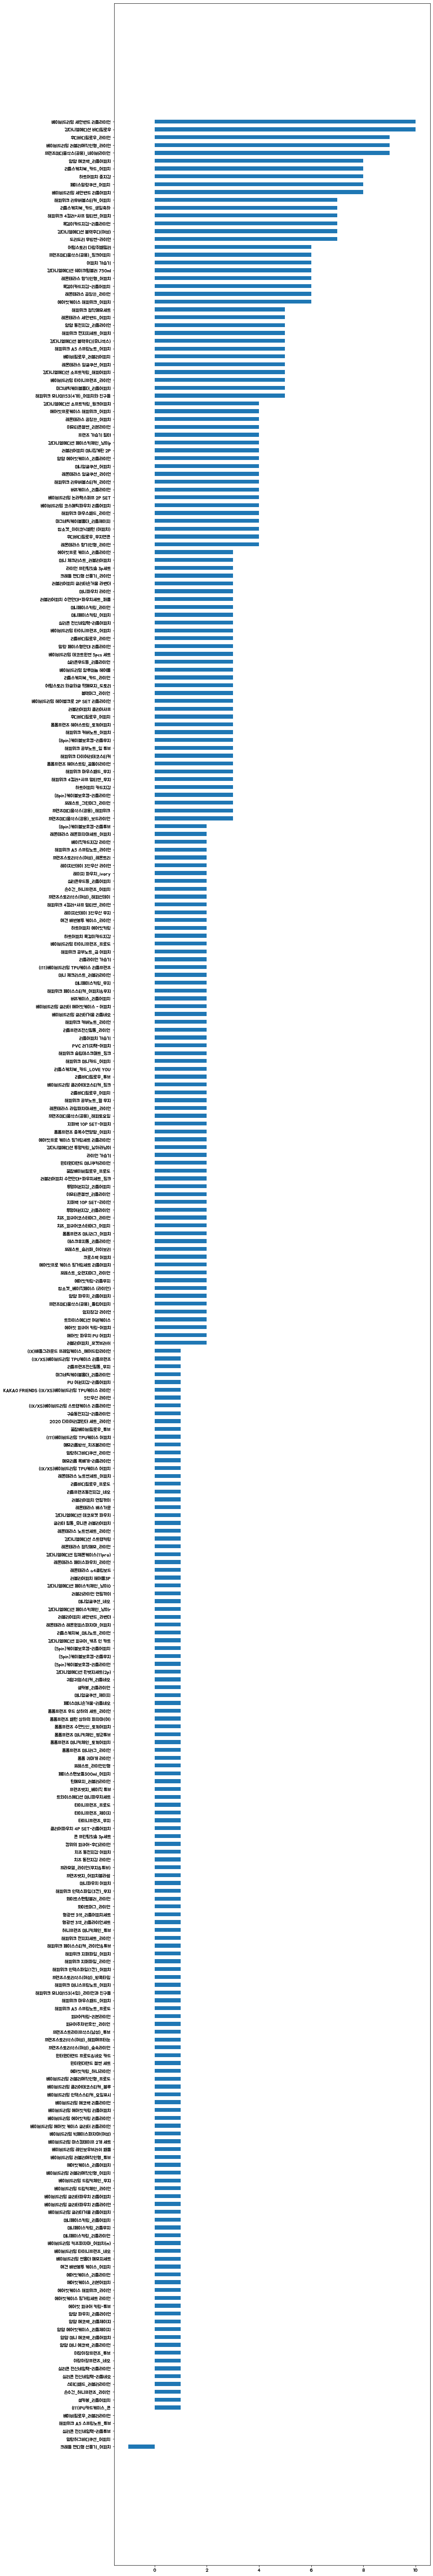

In [146]:
#monthly_sale.plot(kind="barh")
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\\Users\\Joanna Kang\\AppData\\Local\\Microsoft\\Windows\\Fonts\\BMJUA_ttf.ttf").get_name()
rc('font', family=font_name)

fig = plt.figure(figsize=(12, 100))
#ax = fig.add_subplot(111)

x = []
y = []

for i in range(len(monthly_sale.index)):
    x.append(monthly_sale.index[i])
    y.append(monthly_sale[7][i])

plt.barh(x, y, align='center', height=0.5) 
width = 0.1
plt.yticks(x)


plt.show()